# 1-Introduction

Nama : Putra Rizqa Yasira

Batch : SBY-004

Processing marketing-campaign data to create new campaigns to increase family customer purchases, processing using jupyter notebook and solving problems with statistics and visualization so that the analysis results can be understood by ordinary people.



[link Tableau](https://public.tableau.com/app/profile/putra.rizqa.yasira/viz/Milestone1byPutraYasira/Milestone1byPutraRizqaYasira?publish=yes)



# 2-Problem Identification

The background of this analysis was made because the store marketing wanted to create a new campaign aimed specifically at customers who have families

Problem Topics searched using the SMART Framework

- Specific: create a new campaign to increase family customer purchases

- Measurable : product purchases by customers who have families increased by 10 percent from the previous campaign

- Achievable : family customer purchases at the store are better

- Relevant: customers who have families make the store a place to go if they want to shop

- Time based: increase in family customer purchases in the next 1 month

Problem Statement

- Create a new campaign to increase purchases for customers who have families so that in the next 1 month family purchases can increase by 10 percent compared to the previous campaign and family customers make the store their preferred shopping place.

Defining the problem:

1. Want to find out the difference in purchases between customers who have a family and not

2. What is the range of annual salary of customers who have a family (descriptive statistics)

3. Does the purchase of family customers have a significant difference with those who are not family? (inferential statistics)

4. Of the products sold in the store, which products are most preferred by family customers

5. what is the family purchase rate in the last 1 year

6. What is the difference between family purchases directly to the store and via the website?

7. Is there a correlation between customers who have children and their total purchases (descriptive statistics)

8. Is there a correlation between family customers who buy discounted products and their total purchases (descriptive statistics)

9. how is the response from family customers regarding previous campaigns

10. are there any complaints given by family customers?

# 3-Data Loading

## 3.1-Import Library

In [15]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

[LINK DATASET](https://www.kaggle.com/datasets/shashankshukla123123/marketing-campaign)

## 3.2-Load Data

In [16]:
df = pd.read_csv('marketing_campaign.csv') #load data csv

In [17]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


there is an index that enters the data so the unnamed column: 0 is deleted

In [18]:
df = df.drop(columns="Unnamed: 0") #delete or drop unnamed column: 0

after deleting it, put it back into the df variable and check the data again

In [19]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


dataframe is appropriate, then further checking is carried out

## 3.3- Check data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

from the info above, it can be seen that there are 28 columns with different data types with a total of 2240 data.

Because here we want to create a new campaign for family customers, so we first check the marital status in the data.

In [21]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

there is some data, but here only married is included in the family, the rest is included in non-family.

count total family customers

In [22]:
total_married = (df['Marital_Status']).value_counts()['Married']

total_married

864

It is found that the total number of customers who are married is 864.

# 4-Data Cleaning

## 4.1-Cleaning Missing Values

In [23]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

in checking the missing value, there are 24 data in the income column

### 4.1.1-Filling Missing Value

In [24]:
df['Income'] = df['Income'].fillna(0)

empty data is filled with the value 0

re-check total empty data

In [25]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

data is clean from missing values

## 4.2- Check Duplicate Data

In [26]:
df.duplicated().sum()

0

there is no duplicate data so the data is clean

## 4.3- Save Data

In [27]:
df.to_csv("cleaned_data_marketing_campaign.csv", index=False)

save the data into a csv file

## 4.4- Load Cleaned Data

In [28]:
df = pd.read_csv("cleaned_data_marketing_campaign.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# 5-Exploratory Data Analysis

## 5.1- Want to know the difference in purchases between customers who are married and not

In [29]:
df['Marital_Status'].value_counts() #check the value of each data

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

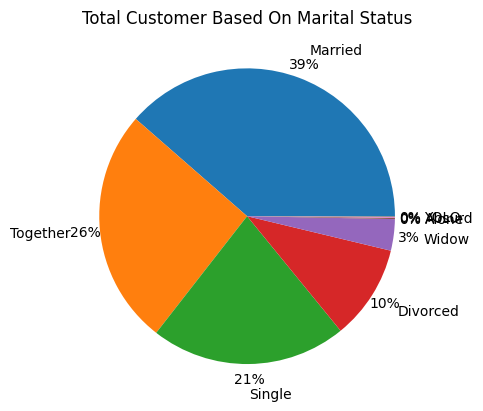

In [65]:
maritalpie = df['Marital_Status'].value_counts()
maritalpie_label = df['Marital_Status'].value_counts().index.to_list()
plt.title('Total Customer Based On Marital Status')
plt.pie(maritalpie, labels=maritalpie_label, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

In the diagram above, it can be seen that married customers have the highest total compared to customers with other marital statuses, where the top 3 are married customers as much as 39%, followed by Together 26%, and single 21%.

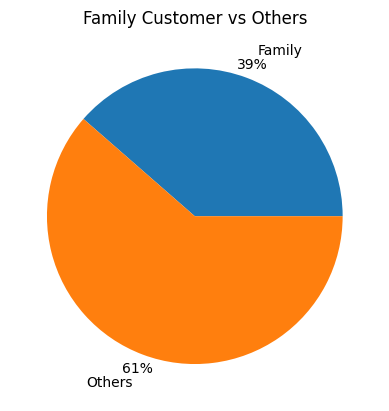

In [81]:
keluarga = df[df['Marital_Status'] == "Married"] #set family variable
non_keluarga = df[~(df['Marital_Status'] == "Married")] #set non-family variable

maritalpie_2 = [len(keluarga) , len(non_keluarga) ]
maritalpie_2_label = "Family", "Others"
plt.title('Family Customer vs Others')
plt.pie(maritalpie_2, labels=maritalpie_2_label, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

In another diagram, it can also be seen from the total of all customer data, 39% of the data are married customers and 61% are the rest.

In [32]:
ffish = keluarga['MntFishProducts'].sum() # total of family fish purchases
ffruit = keluarga['MntFruits'].sum() # total of the family's fruit purchases
fgold = keluarga['MntGoldProds'].sum() # total of the family's gold purchases
fmeat = keluarga['MntMeatProducts'].sum() # total of family meat purchases
fsweet = keluarga['MntSweetProducts'].sum() # total of the family's sweet purchases
fwines= keluarga['MntWines'].sum() # total of the family's wine purchases
nffish = non_keluarga['MntFishProducts'].sum() # total of non-family fish purchases
nffruit = non_keluarga['MntFruits'].sum() # total of non-family fruit purchases
nfgold = non_keluarga['MntGoldProds'].sum() # total from non-family gold purchases
nfmeat = non_keluarga['MntMeatProducts'].sum() # total of non-family meat purchases
nfsweet = non_keluarga['MntSweetProducts'].sum() # total of non-family purchases of sweet products
nfwines = non_keluarga['MntWines'].sum() # total of non-family wine purchases

keluarga_total = ffish + ffruit + fgold + fmeat + fsweet + fwines # total count of family purchases
non_keluarga_total = nffish + nffruit + nfgold + nfmeat + nfsweet + nfwines # total count of non-family purchases

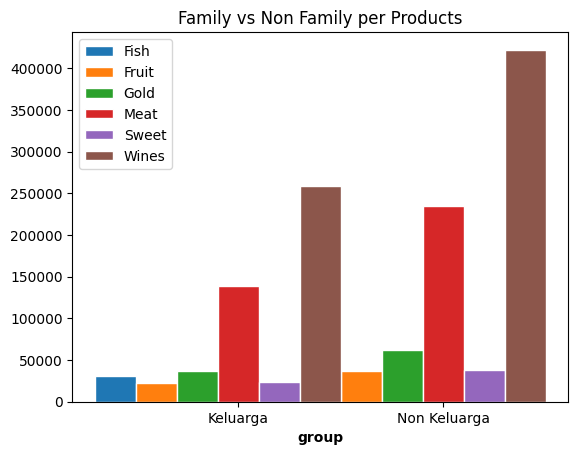

In [67]:
barWidth = 0.2
x = np.arange(2) 

fishdiff = [ffish,nffish] #differences in family vs. non-family fish
fruitdiff = [ffruit,nffruit] #family vs. non-family fruit differences
goldiff = [fgold,nfgold] #family gold vs. non
meatdiff = [fmeat,nfmeat] #differences in family vs. non-family meat
sweetdiff = [fsweet,nfsweet] #differences in family vs. non-family sweet products
winesdiff = [ fwines,nfwines] #differences in family vs. non-family wines

plt.bar(x-0.6, fishdiff, width=barWidth, edgecolor='white', label='Fish')
plt.bar(x-0.4, fruitdiff, width=barWidth, edgecolor='white', label='Fruit')
plt.bar(x-0.2, goldiff, width=barWidth, edgecolor='white', label='Gold')
plt.bar(x, meatdiff, width=barWidth, edgecolor='white', label='Meat')
plt.bar(x+0.2, sweetdiff, width=barWidth, edgecolor='white', label='Sweet')
plt.bar(x+0.4, winesdiff, width=barWidth, edgecolor='white', label='Wines')
plt.title('Family vs Non Family per Products')
plt.xlabel('group', fontweight='bold')
plt.xticks(x, ['Keluarga', 'Non Keluarga'])

plt.legend()
plt.show()


comparison of family and non-family purchases per product

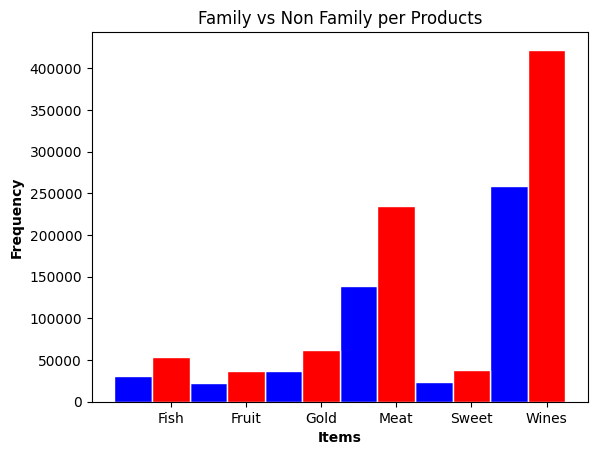

In [68]:
# Data
barWidth = 0.5
x_family = np.arange(6)  # Value of x for family group
x_non_family = [x + barWidth for x in x_family]  # Value of x for non-family group

# Plot
plt.bar(x_family, [ffish, ffruit, fgold, fmeat, fsweet, fwines], color='b', width=barWidth, edgecolor='white', label='Family')
plt.bar(x_non_family, [nffish, nffruit, nfgold, nfmeat, nfsweet, nfwines], color='r', width=barWidth, edgecolor='white', label='Non-Family')

# Label dan legenda
plt.title('Family vs Non Family per Products')
plt.xlabel('Items', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.xticks(x_non_family, ['Fish', 'Fruit', 'Gold', 'Meat', 'Sweet', 'Wines'])

# Tampilkan plot
plt.show()

the ratio of total family and non-family purchases per product, blue represents family purchases, and red represents non-family purchases.

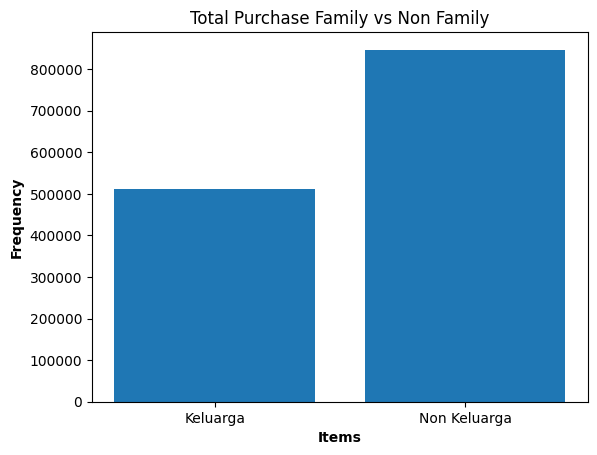

In [69]:
totalbelanja = [keluarga_total,non_keluarga_total]
barWidth = 0.8
x = np.arange(2)
plt.bar(x, totalbelanja, width=barWidth)
plt.title('Total Purchase Family vs Non Family')
plt.xlabel('Items', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.xticks(x, ['Keluarga', 'Non Keluarga'])

plt.show()

comparison of family and non-family purchases in terms of total spending

## 5.2- What is the annual salary range of a married customer (descriptive statistics)

minimum data check

In [36]:
print(keluarga['Income'].min())

0.0


because previously there was a missing value filled with 0 so that the minimum value became 0, if you use this value, it does not describe the value of the range, so the second lowest value in the data is sought.

In [37]:
scndmin = sorted(set(keluarga['Income']))[1] # cek data minimal kedua

calculates the range using the max value of the income column and the min using the second-lowest value after 0.

In [38]:
range = keluarga['Income'].max() - scndmin
print('Range Gajih Customer Berkeluarga : $',range)
print('from $',scndmin, 'to $', keluarga['Income'].max())

Range Gajih Customer Berkeluarga : $ 158356.0
from $ 2447.0 to $ 160803.0


The annual salary of a customer with a family is about $158,356, from a low of $2,447 to a high of $160803.

## 5.3- Does the purchase of family customers have a significant difference with those who are not family? (inferential statistics)

create a new total purchase table for total purchases from family and non-family.

In [39]:
keluarga['total_purchase'] = keluarga['MntFishProducts'] + keluarga['MntFruits'] + keluarga['MntGoldProds'] + keluarga['MntMeatProducts'] + keluarga['MntSweetProducts'] + keluarga['MntWines']
non_keluarga['total_purchase'] = non_keluarga['MntFishProducts'] + non_keluarga['MntFruits'] + non_keluarga['MntGoldProds'] + non_keluarga['MntMeatProducts'] + non_keluarga['MntSweetProducts'] + non_keluarga['MntWines']


calculate the average for the depiction of the total purchase data of the two types of customers

In [40]:
print('Average Purchases of Family =',keluarga['total_purchase'].mean())
print('Average Purchases of Non Family =',non_keluarga['total_purchase'].mean())

Average Purchases of Family = 590.8020833333334
Average Purchases of Non Family = 615.2143895348837


the average purchase of family customers is around 591 purchases while non-family customers are around 615 purchases.

Make a hypothesis to check whether there is a significant difference or not.

**H0**: Average Family == Non-Family purchases

**H1**: Average Family purchase == Non-Family

In [41]:
t_stat, p_val = stats.ttest_ind(keluarga['total_purchase'],non_keluarga['total_purchase'])
print('T-Statistic:',t_stat)
print('P-value:',p_val/2)

T-Statistic: -0.933817868054311
P-value: 0.17524929403550477


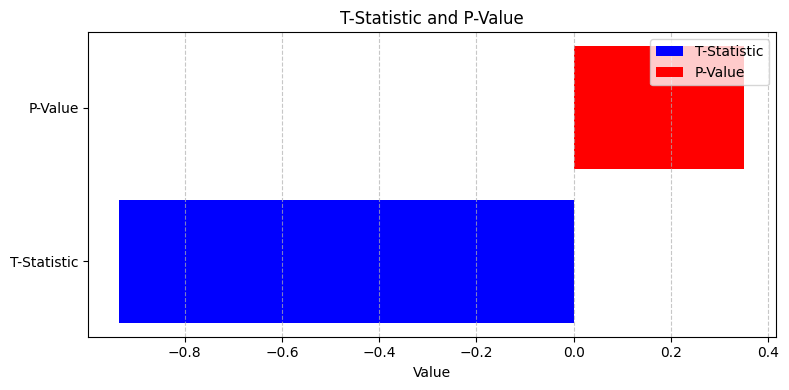

In [62]:
plt.figure(figsize=(8, 4))

# buat bar
plt.barh(y=0, width=t_stat, color='blue', label='T-Statistic')

# P-Value
plt.barh(y=1, width=p_val, color='red', label='P-Value')

# label dan legenda
plt.yticks([0, 1], ['T-Statistic', 'P-Value'])
plt.xlabel('Value')
plt.title('T-Statistic and P-Value')
plt.legend(loc='upper right')

# show visualisasinya
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

According to the results of the t-test, it was found that the p-value was greater than 0.05, so H0 failed to be rejected, so there was no significant difference in purchases between family and non-family.

## 5.4- Of the products sold in the store, which products are most favored by family customers

In [42]:
print("Total Pembelian Produk Ikan : ",ffish)
print("Total Pembelian Produk Buah : ",ffruit)
print("Total Pembelian Produk Emas : ",fgold)
print("Total Pembelian Produk Daging : ",fmeat)
print("Total Pembelian Produk Manis : ",fsweet)
print("Total Pembelian Produk Anggur : ",fwines)

Total Pembelian Produk Ikan :  30569
Total Pembelian Produk Buah :  22235
Total Pembelian Produk Emas :  36999
Total Pembelian Produk Daging :  138829
Total Pembelian Produk Manis :  23070
Total Pembelian Produk Anggur :  258751


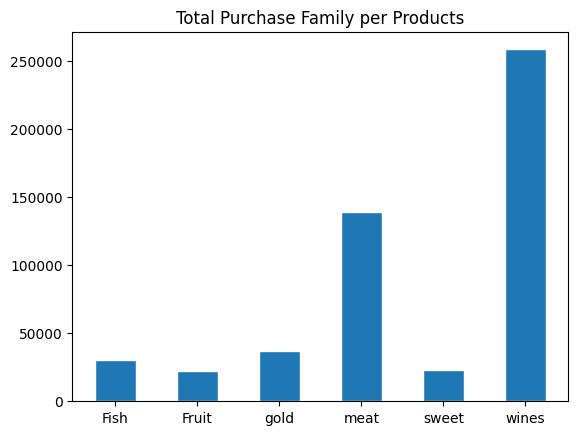

In [70]:
barWidth = 0.5
y_pos = np.arange(6)

# buat bar
plt.title('Total Purchase Family per Products')
plt.bar(y_pos, [ffish, ffruit, fgold, fmeat, fsweet, fwines], width=barWidth, edgecolor='white', label='Family')

# buat axis dan nama
plt.xticks(y_pos, ['Fish','Fruit','gold','meat','sweet','wines'])

# tampilkan visualisasi
plt.show()

From the diagram above, wine is the highest purchase by families, followed by purchases of meat products, gold, fish, and finally sweet and fruit products.

## 5.5- What is the level of family purchases in the last 1 month

provide filters for purchases last 30 days and above 30 days but below 90 days or 3 months

In [78]:
fam30d = len(keluarga[(keluarga['Recency'] <= 30)])
fam90d = len(keluarga[(keluarga['Recency'] <= 90) & (keluarga['Recency'] > 30)])

In [79]:
print(len(keluarga['Recency']))
print(fam90d)
print(fam30d)

864
478
297


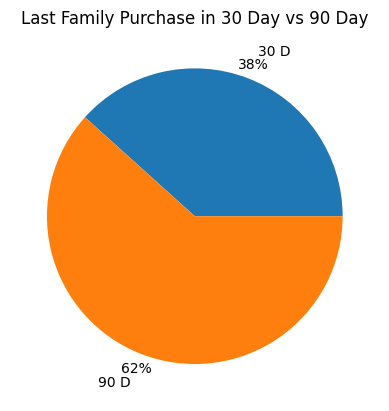

In [80]:
fampie = [fam30d,fam90d]
fampie_label = "30 D", "90 D"
plt.title('Last Family Purchase in 30 Day vs 90 Day')
plt.pie(fampie, labels=fampie_label, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

out of 864 total recent purchases from family customers, 38% or around 297 purchases were made in the last 30 days, while the remaining 62% or 478 purchases were made in the last 3 months.

## 5.6- What is the difference between buying a family directly to the store and via the website

In [47]:
print("Pembelian Via Web",keluarga['NumWebPurchases'].sum())
print("Pembelian Via Langsung ke Toko",keluarga['NumStorePurchases'].sum())

Pembelian Via Web 3532
Pembelian Via Langsung ke Toko 5055


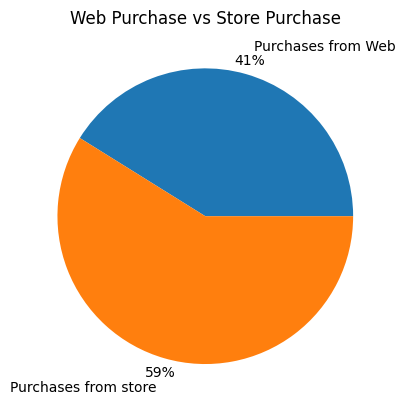

In [72]:
purchasepie = [keluarga['NumWebPurchases'].sum() , keluarga['NumStorePurchases'].sum() ]
purchasepie_label = "Purchases from Web", "Purchases from store"
plt.title('Web Purchase vs Store Purchase')
plt.pie(purchasepie, labels=purchasepie_label, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

59% of purchases are made by customers who come directly to the store, while 41% of purchases are made through the company's website.

## 5.7- Is there a correlation between customers who have children and their total spending (descriptive statistics)

create new columns for total purchases and total children

In [49]:
df['total_purchase'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']
df['total_anak'] = df['Kidhome'] + df['Teenhome']

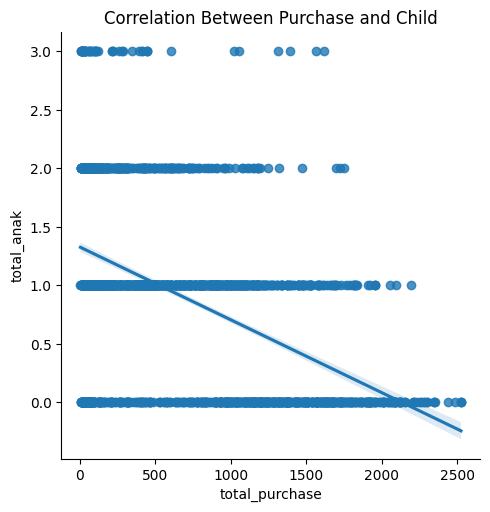

In [74]:
sns.lmplot(data=df,x='total_purchase', y='total_anak').set(title='Correlation Between Purchase and Child')

in the visualization above, there is still no clear correlation so that testing using Pearson is carried out regarding the correlation.

In [51]:
corr_r, pval_p = stats.pearsonr(df['total_purchase'], df['total_anak'])  

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}") 

r-correlation: -0.50, p-value: 2.762880905606669e-141


The p-value is far below 0.05 so the probability of coincidence is small or real, and the correlation between purchase and the number of children of the customer is negative because the correlation is close to -1, -0.5.

## 5.8- Is there a correlation between family customers who buy discounted products and the amount they spend (descriptive statistics)

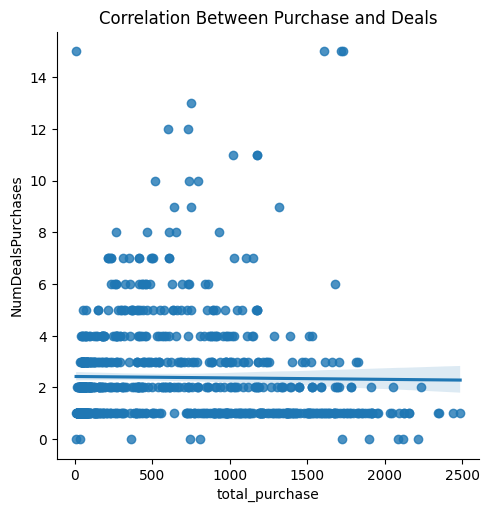

In [75]:
sns.lmplot(data=keluarga,x='total_purchase', y='NumDealsPurchases').set(title='Correlation Between Purchase and Deals')

in the visualization above, there is a correlation, to prove it, correlation testing is carried out using kendall

In [59]:
corr_r, pval_p = stats.pearsonr(keluarga['total_purchase'], keluarga['NumDealsPurchases'])  

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}") 

r-correlation: -0.02, p-value: 0.6328469575872244


The p-value is above 0.05 so the probability of coincidence is high, and the correlation between purchase and discount is almost no correlation because it is close to 0 but may have a negative but low correlation because the correlation value is -0.02.

## 5.9- How have family customers responded to previous campaigns?

In [54]:
keluarga['Response'].sum()

98

there were a total of 98 family customers who responded regarding previous campaigns

In [55]:
c1 = keluarga['AcceptedCmp1'].sum()
c2 = keluarga['AcceptedCmp2'].sum()
c3 = keluarga['AcceptedCmp3'].sum()
c4 = keluarga['AcceptedCmp4'].sum()
c5 = keluarga['AcceptedCmp5'].sum()

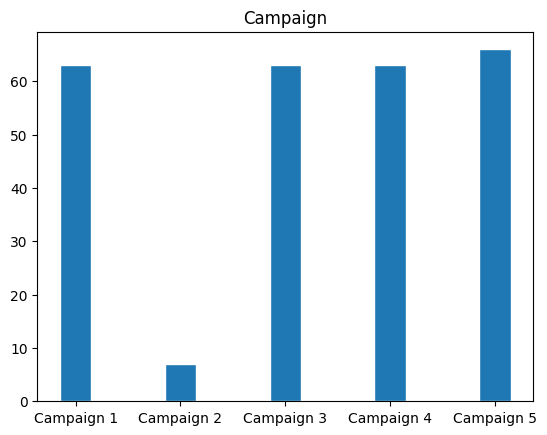

In [76]:
barWidth = 0.3
y_pos = np.arange(5)

# buat bar
plt.title('Campaign')
plt.bar(y_pos, [c1,c2,c3,c4,c5], width=barWidth, edgecolor='white', label='Family')

#buat axis
plt.xticks(y_pos, ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5'])

# Show visualisasi
plt.show()

where the diagram above displays the results of previous campaigns, only in the second campaign the success is small

## 5.10- Are there any complaints made by customers with families?

In [57]:
print(keluarga['Complain'].sum())
non_keluarga['Complain'].sum()

8


13

when checked, there were 8 complaints from family customers and 13 complaints from non-family customers.

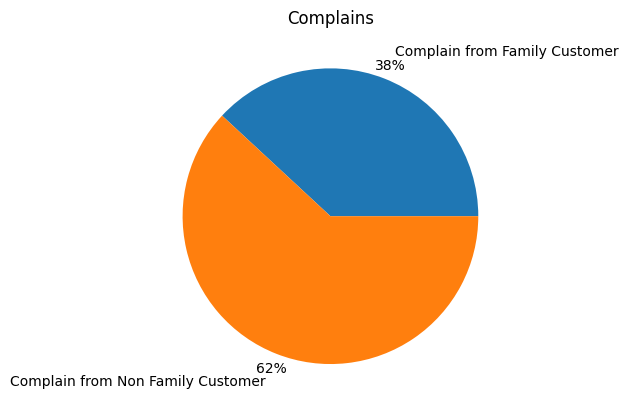

In [77]:
complainepie = [keluarga['Complain'].sum() , non_keluarga['Complain'].sum() ]
complainpie_label = "Complain from Family Customer", "Complain from Non Family Customer"
plt.title('Complains')
plt.pie(complainepie, labels=complainpie_label, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

The diagram also illustrates that 38% of complaints are made by family customers.

# 6-Conclusion

From the results of the analysis that has been done, there are several insights as follows:
- Married customers are the most common customers in the store with a total of 39%.
- The annual salary range of married customers is around $158,356.
- The most popular products purchased by married customers are wine followed by meat, gold, fish and the least popular are sweets and fruit.
- 38% of purchases made by family customers were made in the last 1 month
- 59% of purchases made directly to the store by family customers
- There is a negative correlation between total purchases and number of children, but no correlation between total purchases and available discounts
- 98 customers responded to previous campaigns
- The 3 most successful campaigns were campaigns 4, 3 and 5
- There are 38% of complaints given by family customers

Suggestions that can be given for the next campaign are:
- Increase the stock of wine, meat, and gold and create more family-appealing advertisements for these products.
- Provide discounts for fish products, sweet products, and fruit to increase their purchases and reduce damaged products because they are not in demand by customers
- Make a customer survey, especially for family customers regarding what needs to be improved by the store so that it can be used as material for store evaluation.
- The campaign that is made can also follow the previous campaign 3,4,5 because of its high success rate
- From some of the analysis results obtained and the suggestions given, it can be used as a reference to be able to achieve a 10% increase in family customer purchases in the next 1 month with the new campaign that will be carried out.